# Test Models

This notebook tests deep learning models for enhanced JPEG reconstruction.

In [1]:
%matplotlib inline
from __future__ import print_function, division
import matplotlib.pylab as plt
import numpy as np
from keras.optimizers import Adam
import os
import glob
import StringIO
from PIL import Image
import sys

# Importing our U-Net model
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
from models import unet

/home/roberto/Documents/virtualenv/venv04/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Train and validation data paths
test_path = "/media/roberto/DATA/GDrive/MR-Data/JPEG-compression/tiff/Test/*.tif"

# Listing train and validation images
test_images = glob.glob(test_path)

# Summary of images
print("Test set size:", len(test_images))

Test set size: 3120


In [3]:
H,W = 256, 256
norm = 255.0
compr_range = (15,20)

test_unc = np.zeros((len(test_images),H,W,1),dtype = np.float32)
test_compr = test_unc.copy()
compr_test = np.random.choice(np.arange(compr_range[0],compr_range[1], dtype=int), \
                               len(test_images),replace = True)


# Test set
for ii in range(len(test_images)):
    # Load uncompressed image
    im1 = Image.open(test_images[ii])
    test_unc[ii,:,:,0] = np.array(im1)

    # JPEG compress the image    
    buffer = StringIO.StringIO()
    im1.save(buffer, "JPEG", quality=compr_test[ii])
    im2 = Image.open(buffer)
    test_compr[ii,:,:,0] = np.array(im2)
    
test_unc /= norm
test_compr /= norm

In [4]:
model_name = "../Models/residual_unet_compress_5_15.hdf5"
opt = Adam()
model = unet(input_size = (256 ,256 ,1),drop = 0.0,residual = True)
model.compile(loss = "mse",optimizer=opt)

pred = model.predict(test_compr)

Test set results


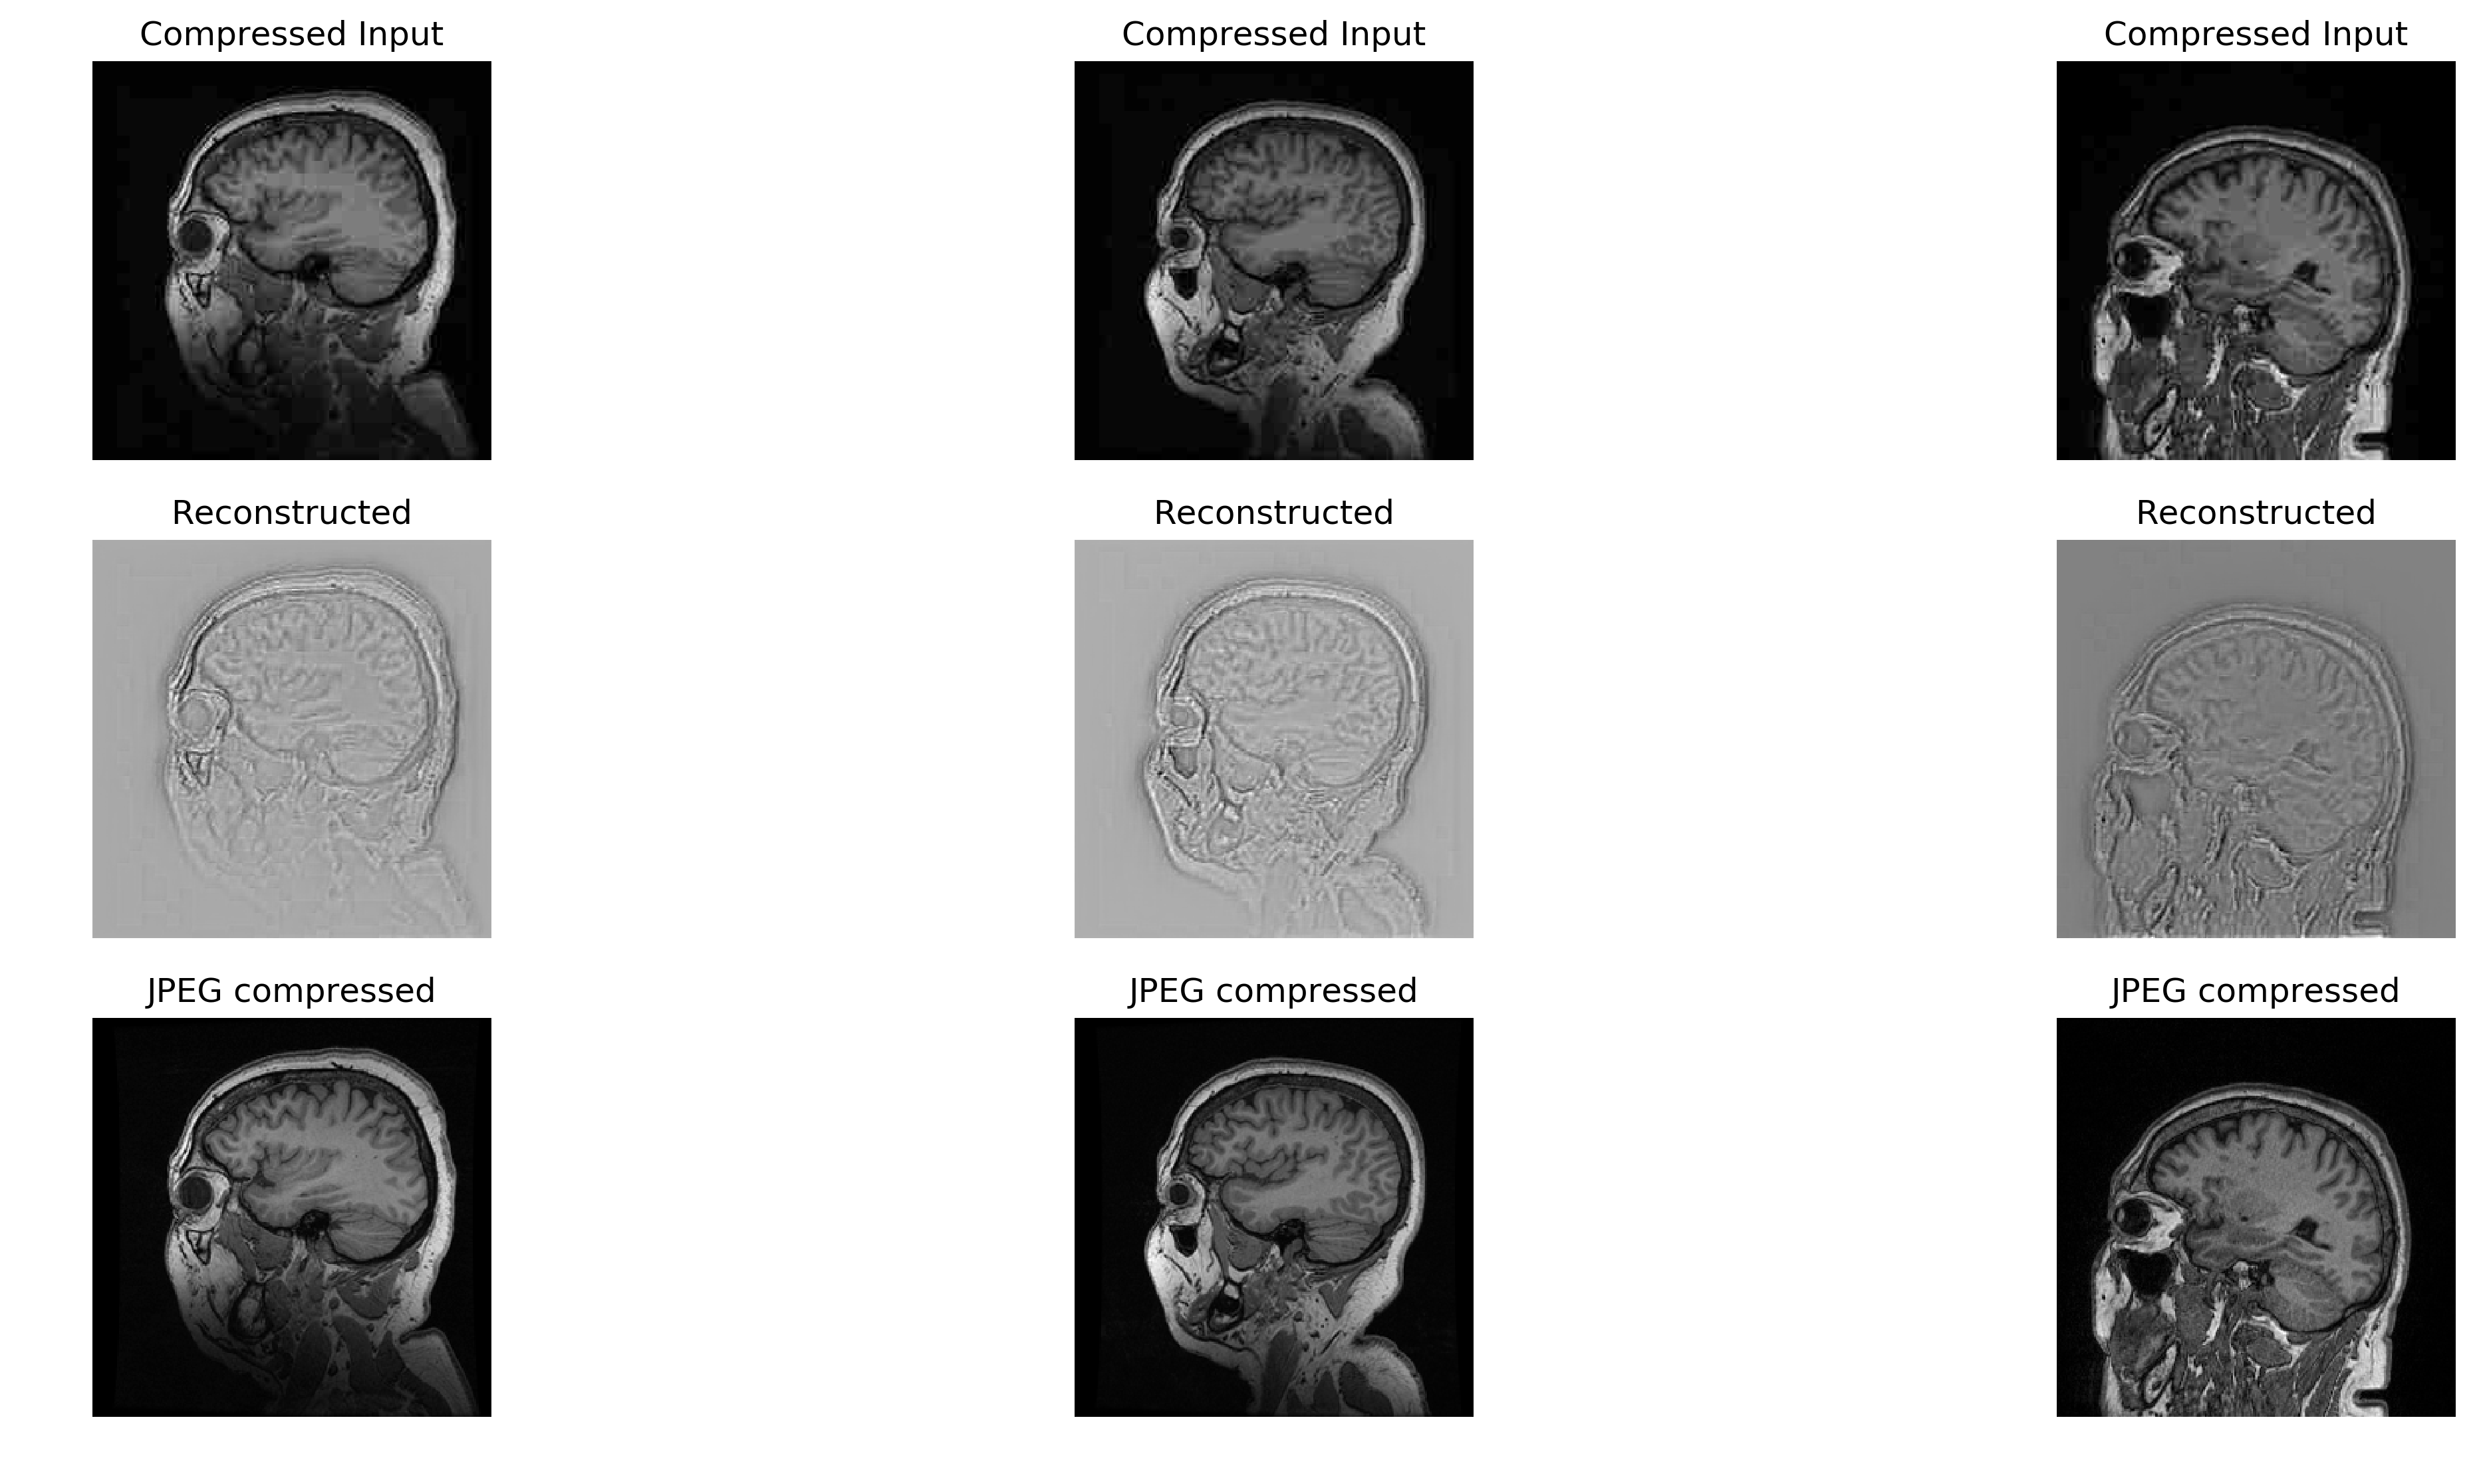

In [5]:
indexes_test = np.arange(len(test_images),dtype = int)
np.random.shuffle(indexes_test)
indexes_test = indexes_test[:3]

print("Test set results")
plt.figure(figsize = (18,9),dpi = 300)
for ii in range(3):
    plt.subplot(3,3,ii+1)
    plt.imshow(test_compr[indexes_test[ii],:,:,0],cmap = "gray")
    plt.axis("off")
    plt.title("Compressed Input")
    plt.subplot(3,3,ii + 4)
    plt.imshow(pred[indexes_test[ii],:,:,0],cmap = "gray")
    plt.axis("off")
    plt.title("Reconstructed")
    plt.subplot(3,3,ii + 7)
    plt.imshow(test_unc[indexes_test[ii],:,:,0],cmap = "gray")
    plt.axis("off")
    plt.title("JPEG compressed")
plt.show()    